<a href="https://colab.research.google.com/github/axrd/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Alejandro_Ruperti_Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
# Creating a y-vector of our target variable 'price' and an X matrix for our features.
# Drop 'price' from the X matrix to avoid errors.
y = df.price
X = df.drop('price', axis = 1)

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
# Split the data evenly (50/50) and set a random state for reproducibility:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
# Creating Lin Regression using Scikit-Learn:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
print("Coefficients: \n", model.coef_)
print("\n Intercept: \n", model.intercept_)

Coefficients: 
 [  -35.22479484 -1672.11973555   -37.12848399   269.61582544
 -1284.74375962  4649.46225339  1098.2829573   7886.89079148]

 Intercept: 
 -2184591.0115608736


## 1.5 Use the test data to make predictions

In [0]:
# Making predictions using the test set of the data:
y_test_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [11]:
# Calculating & printing model's Mean-Square error, Root-Mean-Square Error, and R2:
MSE = mean_squared_error(Y_test, y_test_pred)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_pred)))

R2 = r2_score(Y_test, y_test_pred)

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

MSE is 504905647.2241802
RMSE is 22470.10563446866
R^2 is 0.2694482951962195


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?



---
Coefficients describe how much x is associated with y, or in this case, how much a car's age is associated with it's price. It is an elasticity metric. For every change in year, there's a corresponding change of $1098 on the price. 

---



## 1.8 How should we interpret the Root-Mean-Square Error?

In [10]:
df.price.describe()

count      8495.000000
mean      16185.453305
std       24449.641512
min         259.350000
25%        5490.000000
50%        9500.000000
75%       17145.600000
max      547800.000000
Name: price, dtype: float64


---


RMSE is the square root of the variance of the residuals in a model. It measures the difference between values that are predicted by a model, and those that are actually observed. In other words, it's a measure of a model's *accuracy*.

Our model had an RMSE of 22,470.11, which is roughly equivalent to a standard deviation of our target variable "price". Put another way, our model does have some predictive power, but the errors can probably be reduced by leveraging polynomial and/or log-linear regression. 


---



## 1.9 How should we interpret the $R^2$?



---


$R^2$ (or the "coefficient of determination") aims to calculate how much of the dependent variable's variation is explained by the independent variable. It represents the 'goodness of fit' of a model on a 0 to 1 scale. Our $R^2$ was a paltry 0.269, which means that our model can only explain ~ 27% of the variation in price. Not a good fit. 


---



# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
# Creating a new variable: "Ln(Price)"
df['ln_price'] = np.log(df['price'])

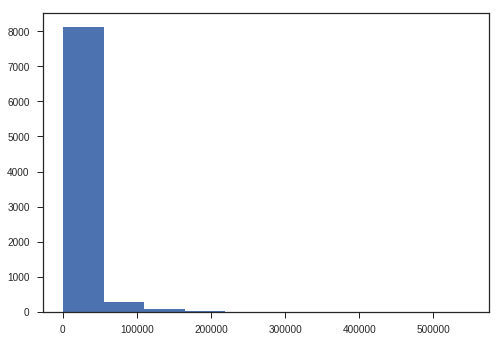

In [32]:
# Visualizing the distribution of "price":
plt.hist(df.price);

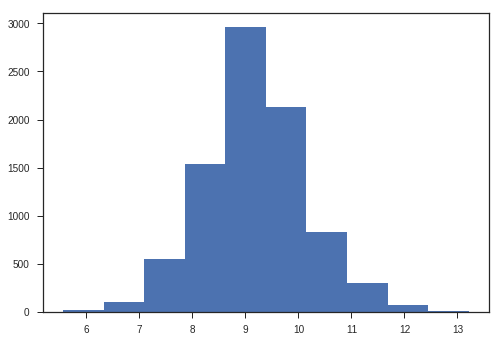

In [33]:
plt.hist(df.ln_price);



---

We can see that Ln(Price) eliminates the skew in our target variable, normalizing it.


---



## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

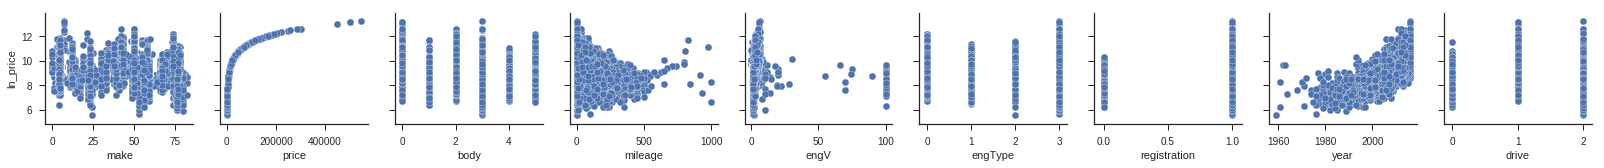

In [37]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including Ln(price):
x_columns = df.columns.drop(['ln_price'])

# Plotting scatterplots of x variables with our y variable:
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns);



---

It appears that "year" has a non-linear relationship as it displays a slightly ascending parabolic shape. Engineering a "year_squared" variable may improve our model. 


---



## 2.3 If appropriate, create any polynomial features. 

(array([6.000e+00, 2.000e+00, 1.000e+01, 3.400e+01, 1.300e+02, 3.200e+02,
        5.080e+02, 1.318e+03, 3.451e+03, 2.716e+03]),
 array([1959. , 1964.7, 1970.4, 1976.1, 1981.8, 1987.5, 1993.2, 1998.9,
        2004.6, 2010.3, 2016. ]),
 <a list of 10 Patch objects>)

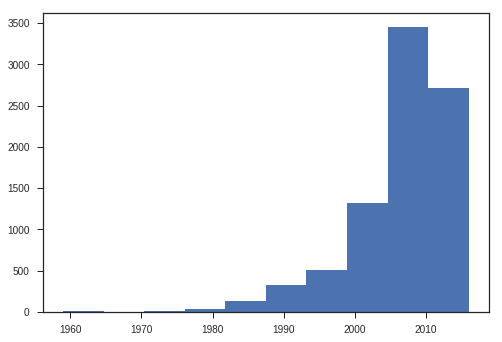

In [44]:
# Creating a new variable: "year_squared"
df['year_squared'] = df['year']**2

plt.hist(df.year)


(array([6.000e+00, 2.000e+00, 1.000e+01, 3.400e+01, 1.300e+02, 3.200e+02,
        6.510e+02, 1.175e+03, 3.451e+03, 2.716e+03]),
 array([3837681. , 3860338.5, 3882996. , 3905653.5, 3928311. , 3950968.5,
        3973626. , 3996283.5, 4018941. , 4041598.5, 4064256. ]),
 <a list of 10 Patch objects>)

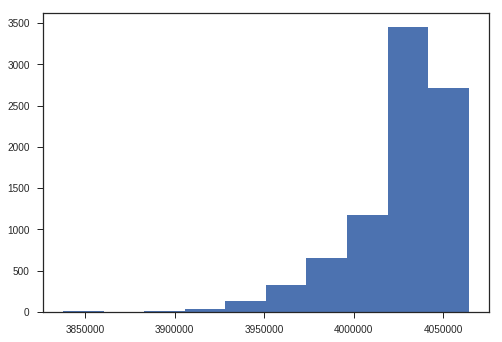

In [45]:
plt.hist(df.year_squared)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [49]:
# Let's figure out what variables we care about
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False)

price           1.000000
ln_price        0.731059
year_squared    0.394395
year            0.393562
drive           0.221952
registration    0.124062
engV            0.066226
engType        -0.021051
body           -0.253726
mileage        -0.336940
Name: price, dtype: float64

In [54]:
### Polynomial & Log-Linear Regression:
# Creating a y-vector of our target variable 'Ln(price)' and an X matrix for our features.
# Separating dependent/independent variables:
y = df.loc[:, ['ln_price']].values
X = df.loc[:, ['year', 'year_squared', 'make', 'drive', 'registration', 'engV',
              'engType', 'body', 'mileage']].values

# Split into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("\n Coefficients: \n", model.coef_[0])
print("\n Intercepts: \n", model.intercept_)

RMSE is 0.5553444740505601
R^2 is 0.67241415523167

 Coefficients: 
 [-6.19087737e+00  1.57155448e-03 -1.61546879e-03  3.82779837e-01
  6.70762698e-01  9.64573698e-03 -4.93594088e-02 -8.56238008e-02
  6.80416242e-04]

 Intercepts: 
 [6103.33282126]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?



---

Since we transformed our price values, our interpretation of coefficients has to change as well. Whereas before they had an elasticity type of interpretation (i.e. for every unit change in price, there is a unit change in x), to having a percentage-terms interpretation. For our model, one unit increase in the year corresponds with a 6.19% increase in the price. 

---



# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?



---

When creating predictive models, accuracy is one of (if not the) primary concerns. It can be measured in a variety of different ways depending on the structure of the model. Perhaps the most common structure is regression. A regression takes some observed values, creates a line that fits their distribution, representing predicted values. These can then be compared to actually observed values, and their difference is referred to as a 'residual'. If you accumulate all of these residuals and take their square root, you're left with an absolute measure of fit for your model. This is known as the Root Mean Square Error and is just one of many ways to measure the accuracy of a model. These errors in prediction can be represented as a Cost Function. Intuitively, if you're model suffers from poor accuracy, you're incurring a cost in predictive power. 

Gradient Descent is an iterative algorithm that seeks to find values that minimize a Cost Function (also known as loss, error, or scoring function) of a predictive model. It does this by taking blind 'steps' in a dimensional space that are proportional to the gradient/slope of the function. One way of conceptualizing this is to imagine you're blindfolded at the edge of a crater. You need to get to the bottom of said crater. How do you navigate there without being able to see? Well you take steps and get a sense for which way is down. You keeping stepping, prioritizing steps that you can feel lead you downward. Once you're at the bottom, the ground flattens again, letting you know that you've arrived. Gradient descent does essentially this, but instead of a crater, you have a Cost Function that you're seeking to minimize and so you're trying to find the global minima of values that represent the lowest possible cost of your predictive power. 


---






## 3.2 What is the "Learning Rate" and what is its function?



---

"Learning Rate" is a measure of how big of a step we initially take in Gradient Descent. These have to be calibrated somewhat so that you can arrive at the minimum point swiftly. If you're taking steps that are too small, you'll require many many updates before reaching the point. If you're taking steps that are too big, you'll cause drastic updates that will lead to divergent behaviors because you'll esentially overshoot the minimum point.

Goint back to our crater example, as soon as you figure out which way is down you can take big steps (i.e. run) down the side of the crater. As the ground starts leveling off, you'll need to take smaller steps to ensure you're still heading towards the bottom of the crater. 


---



# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [56]:
# Statsmodels libray for Regression Model Diagnostics.
# Maintaing the same engineered features as above.
# Running a regression using Robust Standard Errors:


X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:44:31   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6418.6476    624.441     10.279      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [62]:
X = df[['year', 'make', 'drive', 
       'registration', 'engV', 'engType', 'body', 'mileage']]

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['year', 'make', 'drive', 'registration', 'engV', 'engType', 'body',
       'mileage'],
      dtype='object') 


[30.469967624801942, 4.831617998169187, 1.7487353617136145, 18.52979143631658, 1.2385758236552047, 2.733786251462895, 3.506279239170271, 3.676004263355245]




---

Yes, we probably do have multicollinearity issues. "Year", "Year_Squared", and "Registration" all have VIF > 10. Additionally, the Statsmodels Regression had a really large condition number. 

---



In [61]:
# Seeing correlations:
X.corr()

,year,year_squared,make,drive,registration,engV,engType,body,mileage
year,1.000000,0.999995,-0.013833,-0.169709,0.185104,-0.041076,-0.040471,-0.154554,-0.503135
year_squared,0.999995,1.000000,-0.013679,-0.169444,0.185613,-0.041024,-0.040323,-0.154919,-0.504345
make,-0.013833,-0.013679,1.000000,-0.196444,0.104557,-0.021246,-0.011880,0.026127,-0.035097
drive,-0.169709,-0.169444,-0.196444,1.000000,-0.055793,0.084756,-0.044859,-0.162235,0.067962
registration,0.185104,0.185613,0.104557,-0.055793,1.000000,-0.015274,0.152988,-0.082643,-0.229354
engV,-0.041076,-0.041024,-0.021246,0.084756,-0.015274,1.000000,-0.004896,-0.025320,0.042081
engType,-0.040471,-0.040323,-0.011880,-0.044859,0.152988,-0.004896,1.000000,-0.184007,-0.229644
body,-0.154554,-0.154919,0.026127,-0.162235,-0.082643,-0.025320,-0.184007,1.000000,0.287060
mileage,-0.503135,-0.504345,-0.035097,0.067962,-0.229354,0.042081,-0.229644,0.287060,1.000000
